# Animated 3D Rotation of DNA FFT Spectral Plot

Below is a self-contained Python script that:

- Encodes a sample DNA sequence as a complex waveform (A→1, T→–1, C→i, G→–i)  
- Computes the FFT magnitudes at a chosen frequency index  
- Plots a 3D scatter of (Real, Imag, Magnitude)  
- Animates a continuous rotation around the z-axis and saves it as an MP4/GIF  


This rotating view exposes the same “mountain-peak” outliers and ribbon-like backbone from every angle, making the hidden geometry of your DNA FFT analysis truly **pop**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Sample DNA sequence (PCSK9 exon snippet)
sequence = (
    "ATGGGAGGCGGCGGGCCTGGGCGGCGGCGGAGGCGGCGGCGGCGGCGGCGGCGGCGGC"
    "GCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGG"
)

# Complex encoding map
encode_map = {'A': 1+0j, 'T': -1+0j, 'C': 0+1j, 'G': 0-1j}

# Encode sequence
waveform = np.array([encode_map[b] for b in sequence])

# Position-based phase modulation (optional; here uniform)
positions = np.arange(len(waveform))
phase = np.exp(2j * np.pi * positions / len(waveform))
signal = waveform * phase

# Compute FFT
spec = np.fft.fft(signal)
freq_index = 10  # chosen index for dramatic effect
re_vals = spec.real
im_vals = spec.imag
mag_vals = np.abs(spec)

# Prepare figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(re_vals, im_vals, mag_vals,
                     c=mag_vals, cmap='inferno', s=20)

ax.set_xlabel('Real Component')
ax.set_ylabel('Imag Component')
ax.set_zlabel('Magnitude')

# Colorbar
cbar = fig.colorbar(scatter, shrink=0.5, pad=0.1)
cbar.set_label('Spectral Magnitude')

# Animation function
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Create animation: 360° in 120 frames
anim = animation.FuncAnimation(
    fig, rotate, frames=np.linspace(0, 360, 120), interval=100
)

# Save as MP4 (requires ffmpeg) or GIF
anim.save('dna_fft_rotation.mp4', writer='ffmpeg', fps=30)
# anim.save('dna_fft_rotation.gif', writer='imagemagick', fps=30)

plt.close(fig)
print("Animation saved as dna_fft_rotation.mp4")


Animation saved as dna_fft_rotation.mp4


In [ ]:
%pip install biopython

In [ ]:
from Bio import Entrez, SeqIO
import os

# Set your email address - replace with your actual email
Entrez.email = "your_email@example.com"

# Accession number for human beta-globin gene
accession_number = 'NM_000518.5'

try:
    # Fetch the sequence data from NCBI GenBank
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")

    # Read the fetched record
    record = SeqIO.read(handle, "fasta")
    handle.close()

    # Extract the sequence string
    dna_sequence = str(record.seq)

    print(f"Successfully downloaded sequence with accession number: {accession_number}")
    print(f"Sequence length: {len(dna_sequence)}")

except Exception as e:
    print(f"An error occurred: {e}")
    dna_sequence = None


Successfully downloaded sequence with accession number: NM_000518.5
Sequence length: 628


In [ ]:
# Use the downloaded dna_sequence instead of the sample sequence
sequence = dna_sequence

# Complex encoding map (already defined in the previous cell, keep as is)
# encode_map = {'A': 1+0j, 'T': -1+0j, 'C': 0+1j, 'G': 0-1j}

# Encode sequence
waveform = np.array([encode_map.get(b, 0j) for b in sequence]) # Use .get to handle potential non-DNA characters

# Position-based phase modulation (optional; here uniform)
positions = np.arange(len(waveform))
phase = np.exp(2j * np.pi * positions / len(waveform))
signal = waveform * phase

# Compute FFT
spec = np.fft.fft(signal)
# freq_index = 10  # chosen index for dramatic effect (already defined, keep as is)
re_vals = spec.real
im_vals = spec.imag
mag_vals = np.abs(spec)

# Prepare figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(re_vals, im_vals, mag_vals,
                     c=mag_vals, cmap='inferno', s=20)

ax.set_xlabel('Real Component')
ax.set_ylabel('Imag Component')
ax.set_zlabel('Magnitude')

# Colorbar
cbar = fig.colorbar(scatter, shrink=0.5, pad=0.1)
cbar.set_label('Spectral Magnitude')

# Animation function
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Create animation: 360° in 120 frames
anim = animation.FuncAnimation(
    fig, rotate, frames=np.linspace(0, 360, 120), interval=100
)

# Save as MP4 (requires ffmpeg) or GIF
# Ensure the filename is different or handle potential overwrite
anim.save('dna_fft_rotation_HBB.mp4', writer='ffmpeg', fps=30)
# anim.save('dna_fft_rotation_HBB.gif', writer='imagemagick', fps=30)

plt.close(fig)
print("Animation saved as dna_fft_rotation_HBB.mp4")

Animation saved as dna_fft_rotation_HBB.mp4


In [ ]:
# Use the downloaded dna_sequence instead of the sample sequence
sequence = dna_sequence

# Complex encoding map (already defined in the previous cell, keep as is)
# encode_map = {'A': 1+0j, 'T': -1+0j, 'C': 0+1j, 'G': 0-1j}

# Encode sequence
waveform = np.array([encode_map.get(b, 0j) for b in sequence]) # Use .get to handle potential non-DNA characters

# Position-based phase modulation (optional; here uniform)
positions = np.arange(len(waveform))
phase = np.exp(2j * np.pi * positions / len(waveform))
signal = waveform * phase

# Compute FFT
spec = np.fft.fft(signal)
# freq_index = 10  # chosen index for dramatic effect (already defined, keep as is)
re_vals = spec.real
im_vals = spec.imag
mag_vals = np.abs(spec)

# Prepare figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(re_vals, im_vals, mag_vals,
                     c=mag_vals, cmap='inferno', s=20)

ax.set_xlabel('Real Component')
ax.set_ylabel('Imag Component')
ax.set_zlabel('Magnitude')

# Colorbar
cbar = fig.colorbar(scatter, shrink=0.5, pad=0.1)
cbar.set_label('Spectral Magnitude')

# Animation function
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Create animation: 360° in 120 frames
anim = animation.FuncAnimation(
    fig, rotate, frames=np.linspace(0, 360, 120), interval=100
)

# Save as MP4 (requires ffmpeg) or GIF
# Ensure the filename is different or handle potential overwrite
anim.save('dna_fft_rotation_HBB.mp4', writer='ffmpeg', fps=30)
# anim.save('dna_fft_rotation_HBB.gif', writer='imagemagick', fps=30)

plt.close(fig)
print("Animation saved as dna_fft_rotation_HBB.mp4")

Animation saved as dna_fft_rotation_HBB.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Function to display MP4 in the notebook
def display_mp4(filename):
    with open(filename, 'rb') as f:
        video_encoded = b64encode(f.read()).decode('ascii')
    return HTML(f'<video controls src="data:video/mp4;base64,{video_encoded}"></video>')

# Display the generated animation file
display_mp4('dna_fft_rotation_HBB.mp4')

**Reasoning**:
Generate four 2D plots to visualize the real and imaginary parts of the waveform and signal.



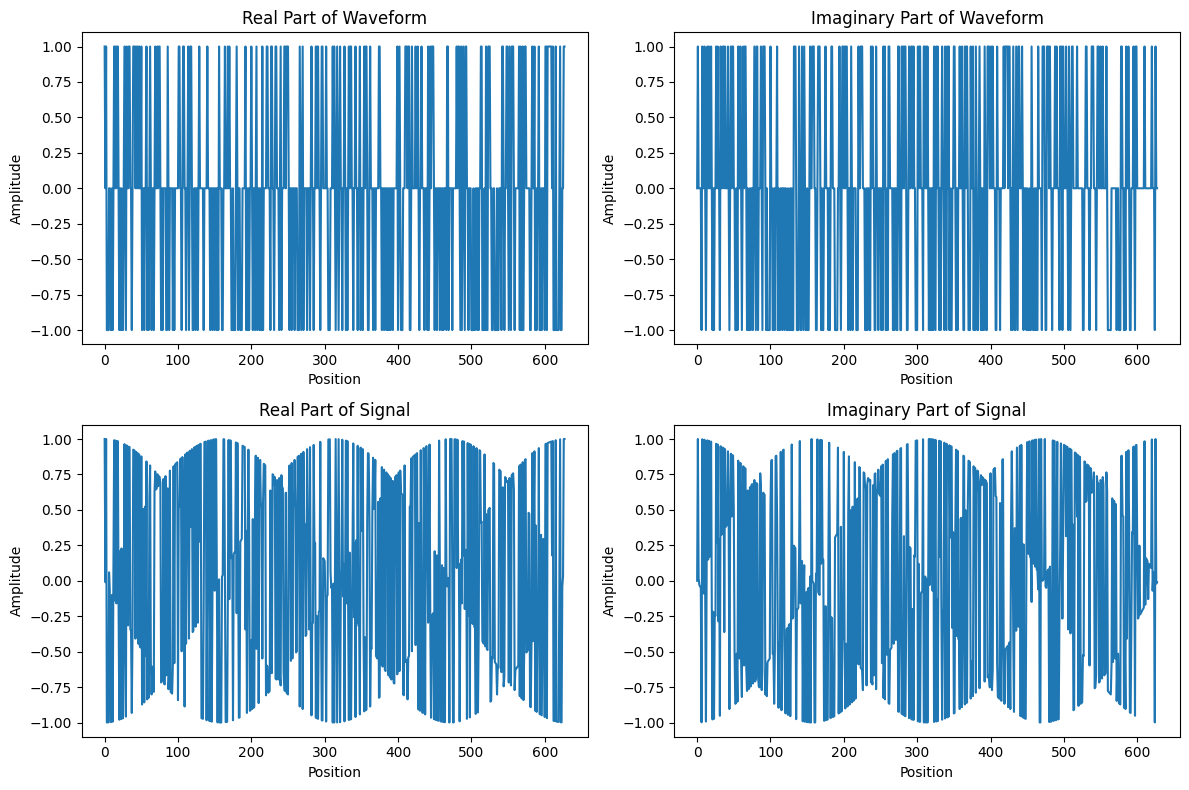

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot real part of waveform
axes[0, 0].plot(np.arange(len(waveform)), waveform.real)
axes[0, 0].set_title('Real Part of Waveform')
axes[0, 0].set_xlabel('Position')
axes[0, 0].set_ylabel('Amplitude')

# Plot imaginary part of waveform
axes[0, 1].plot(np.arange(len(waveform)), waveform.imag)
axes[0, 1].set_title('Imaginary Part of Waveform')
axes[0, 1].set_xlabel('Position')
axes[0, 1].set_ylabel('Amplitude')

# Plot real part of signal
axes[1, 0].plot(np.arange(len(signal)), signal.real)
axes[1, 0].set_title('Real Part of Signal')
axes[1, 0].set_xlabel('Position')
axes[1, 0].set_ylabel('Amplitude')

# Plot imaginary part of signal
axes[1, 1].plot(np.arange(len(signal)), signal.imag)
axes[1, 1].set_title('Imaginary Part of Signal')
axes[1, 1].set_xlabel('Position')
axes[1, 1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

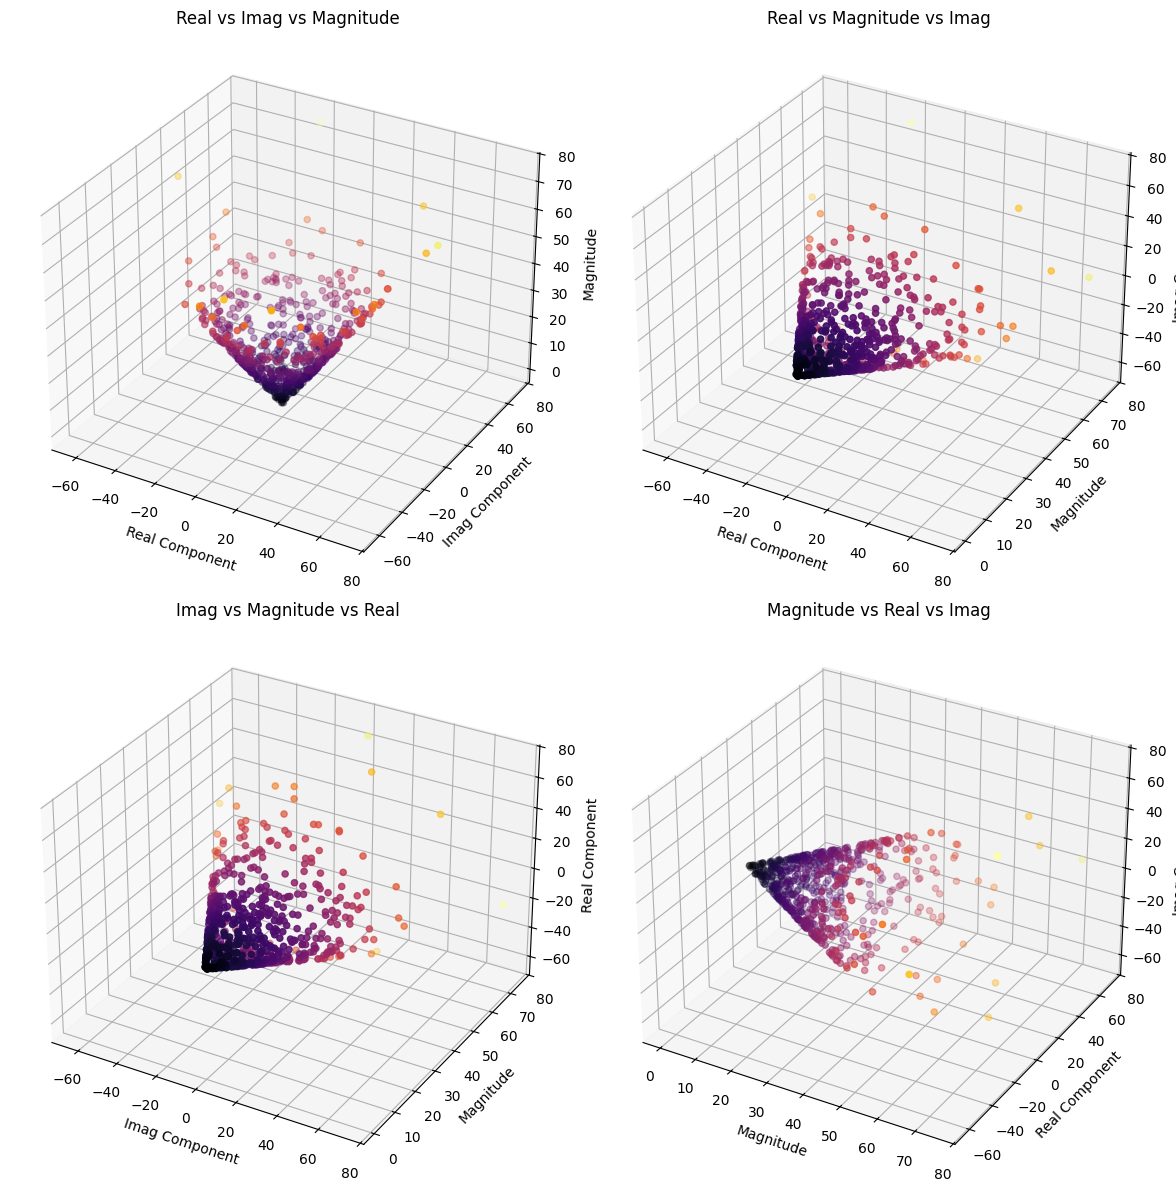

In [ ]:
# Create figure for 3D plots
fig3d = plt.figure(figsize=(12, 12))

# Plot 1: Real vs Imaginary vs Magnitude
ax1 = fig3d.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(re_vals, im_vals, mag_vals, c=mag_vals, cmap='inferno', s=20)
ax1.set_xlabel('Real Component')
ax1.set_ylabel('Imag Component')
ax1.set_zlabel('Magnitude')
ax1.set_title('Real vs Imag vs Magnitude')

# Plot 2: Real vs Magnitude vs Imaginary
ax2 = fig3d.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(re_vals, mag_vals, im_vals, c=mag_vals, cmap='inferno', s=20)
ax2.set_xlabel('Real Component')
ax2.set_ylabel('Magnitude')
ax2.set_zlabel('Imag Component')
ax2.set_title('Real vs Magnitude vs Imag')

# Plot 3: Imaginary vs Magnitude vs Real
ax3 = fig3d.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(im_vals, mag_vals, re_vals, c=mag_vals, cmap='inferno', s=20)
ax3.set_xlabel('Imag Component')
ax3.set_ylabel('Magnitude')
ax3.set_zlabel('Real Component')
ax3.set_title('Imag vs Magnitude vs Real')

# Plot 4: Magnitude vs Real vs Imaginary
ax4 = fig3d.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(mag_vals, re_vals, im_vals, c=mag_vals, cmap='inferno', s=20)
ax4.set_xlabel('Magnitude')
ax4.set_ylabel('Real Component')
ax4.set_zlabel('Imag Component')
ax4.set_title('Magnitude vs Real vs Imag')

plt.tight_layout()
plt.show()

Successfully downloaded sequence with accession number: NM_000518.5
Sequence length: 628


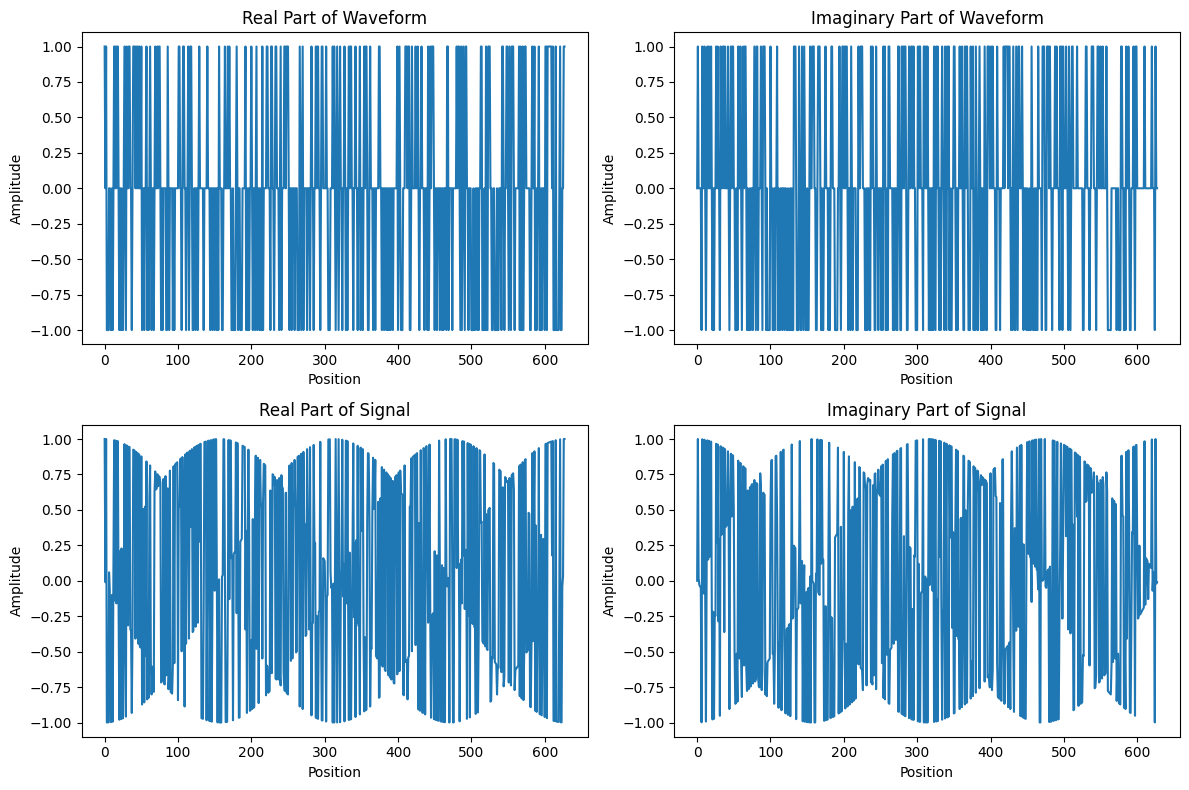

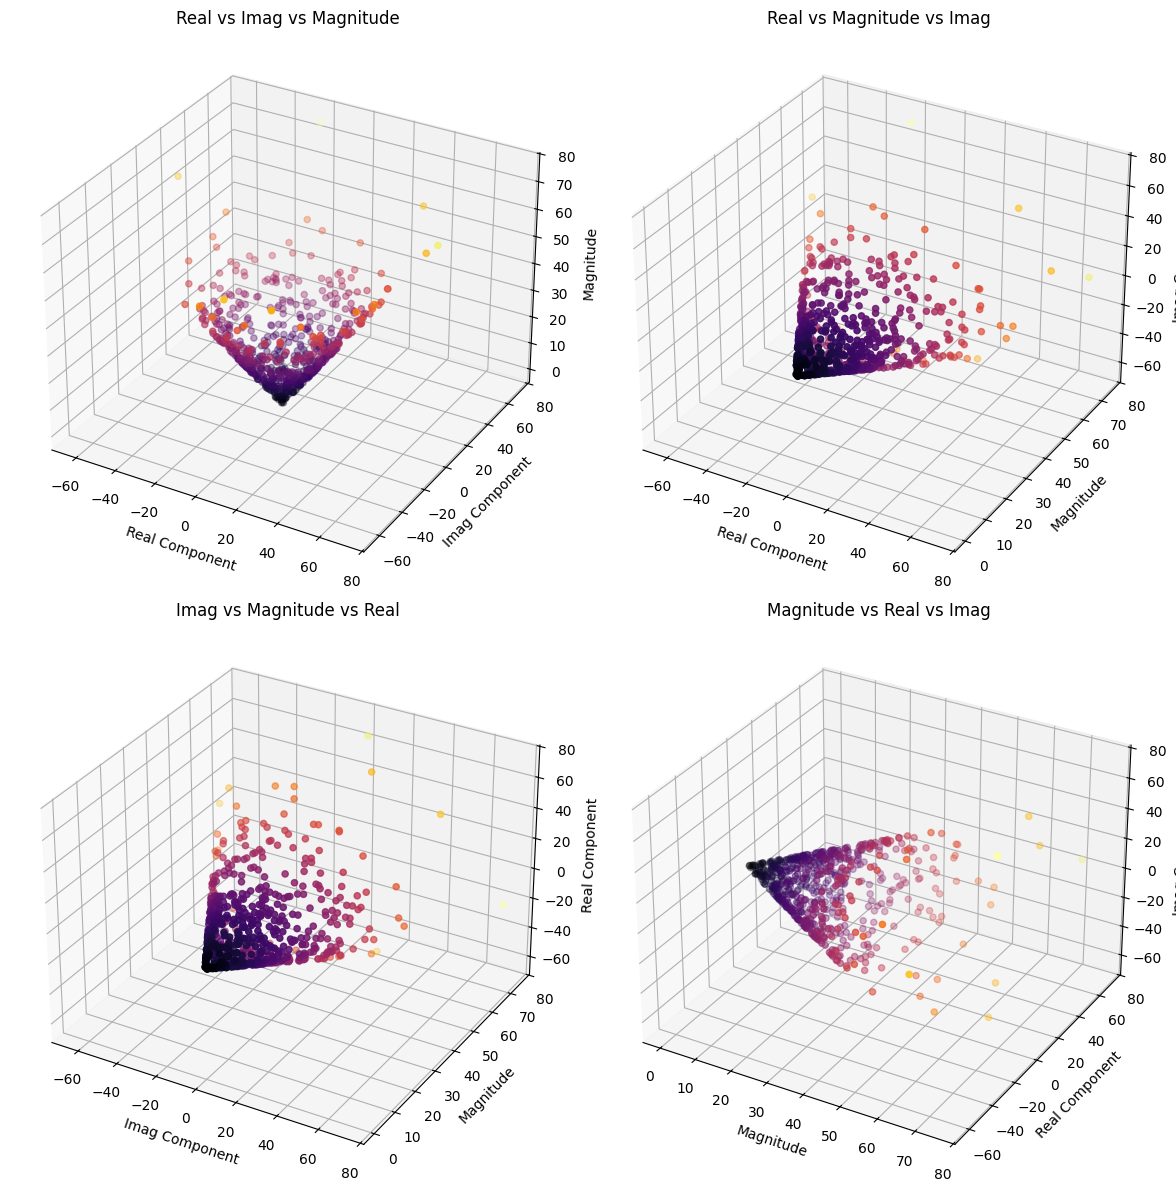

Animation saved as dna_fft_rotation_HBB.mp4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from Bio import Entrez, SeqIO
from IPython.display import HTML
from base64 import b64encode
import os

# Set your email address - replace with your actual email
Entrez.email = "your_email@example.com"

# Accession number for human beta-globin gene
accession_number = 'NM_000518.5'

try:
    # Fetch the sequence data from NCBI GenBank
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")

    # Read the fetched record
    record = SeqIO.read(handle, "fasta")
    handle.close()

    # Extract the sequence string
    dna_sequence = str(record.seq)

    print(f"Successfully downloaded sequence with accession number: {accession_number}")
    print(f"Sequence length: {len(dna_sequence)}")

except Exception as e:
    print(f"An error occurred: {e}")
    dna_sequence = None

if dna_sequence:
    # Use the downloaded dna_sequence instead of the sample sequence
    sequence = dna_sequence

    # Complex encoding map
    encode_map = {'A': 1+0j, 'T': -1+0j, 'C': 0+1j, 'G': 0-1j}

    # Encode sequence
    waveform = np.array([encode_map.get(b, 0j) for b in sequence]) # Use .get to handle potential non-DNA characters

    # Position-based phase modulation (optional; here uniform)
    positions = np.arange(len(waveform))
    phase = np.exp(2j * np.pi * positions / len(waveform))
    signal = waveform * phase

    # Compute FFT
    spec = np.fft.fft(signal)
    freq_index = 10  # chosen index for dramatic effect
    re_vals = spec.real
    im_vals = spec.imag
    mag_vals = np.abs(spec)

    # Generate 2D plots
    fig2d, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot real part of waveform
    axes[0, 0].plot(np.arange(len(waveform)), waveform.real)
    axes[0, 0].set_title('Real Part of Waveform')
    axes[0, 0].set_xlabel('Position')
    axes[0, 0].set_ylabel('Amplitude')

    # Plot imaginary part of waveform
    axes[0, 1].plot(np.arange(len(waveform)), waveform.imag)
    axes[0, 1].set_title('Imaginary Part of Waveform')
    axes[0, 1].set_xlabel('Position')
    axes[0, 1].set_ylabel('Amplitude')

    # Plot real part of signal
    axes[1, 0].plot(np.arange(len(signal)), signal.real)
    axes[1, 0].set_title('Real Part of Signal')
    axes[1, 0].set_xlabel('Position')
    axes[1, 0].set_ylabel('Amplitude')

    # Plot imaginary part of signal
    axes[1, 1].plot(np.arange(len(signal)), signal.imag)
    axes[1, 1].set_title('Imaginary Part of Signal')
    axes[1, 1].set_xlabel('Position')
    axes[1, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

    # Generate 3D plots
    fig3d = plt.figure(figsize=(12, 12))

    # Plot 1: Real vs Imaginary vs Magnitude
    ax1 = fig3d.add_subplot(2, 2, 1, projection='3d')
    ax1.scatter(re_vals, im_vals, mag_vals, c=mag_vals, cmap='inferno', s=20)
    ax1.set_xlabel('Real Component')
    ax1.set_ylabel('Imag Component')
    ax1.set_zlabel('Magnitude')
    ax1.set_title('Real vs Imag vs Magnitude')

    # Plot 2: Real vs Magnitude vs Imaginary
    ax2 = fig3d.add_subplot(2, 2, 2, projection='3d')
    ax2.scatter(re_vals, mag_vals, im_vals, c=mag_vals, cmap='inferno', s=20)
    ax2.set_xlabel('Real Component')
    ax2.set_ylabel('Magnitude')
    ax2.set_zlabel('Imag Component')
    ax2.set_title('Real vs Magnitude vs Imag')

    # Plot 3: Imaginary vs Magnitude vs Real
    ax3 = fig3d.add_subplot(2, 2, 3, projection='3d')
    ax3.scatter(im_vals, mag_vals, re_vals, c=mag_vals, cmap='inferno', s=20)
    ax3.set_xlabel('Imag Component')
    ax3.set_ylabel('Magnitude')
    ax3.set_zlabel('Real Component')
    ax3.set_title('Imag vs Magnitude vs Real')

    # Plot 4: Magnitude vs Real vs Imaginary
    ax4 = fig3d.add_subplot(2, 2, 4, projection='3d')
    ax4.scatter(mag_vals, re_vals, im_vals, c=mag_vals, cmap='inferno', s=20)
    ax4.set_xlabel('Magnitude')
    ax4.set_ylabel('Real Component')
    ax4.set_zlabel('Imag Component')
    ax4.set_title('Magnitude vs Real vs Imag')

    plt.tight_layout()
    plt.show()


    # Prepare figure and 3D axis for animation
    fig_anim = plt.figure(figsize=(6, 6))
    ax_anim = fig_anim.add_subplot(111, projection='3d')
    scatter_anim = ax_anim.scatter(re_vals, im_vals, mag_vals,
                         c=mag_vals, cmap='inferno', s=20)

    ax_anim.set_xlabel('Real Component')
    ax_anim.set_ylabel('Imag Component')
    ax_anim.set_zlabel('Magnitude')

    # Colorbar for animation plot
    cbar_anim = fig_anim.colorbar(scatter_anim, shrink=0.5, pad=0.1)
    cbar_anim.set_label('Spectral Magnitude')

    # Animation function
    def rotate(angle):
        ax_anim.view_init(elev=30, azim=angle)

    # Create animation: 360° in 120 frames
    anim = animation.FuncAnimation(
        fig_anim, rotate, frames=np.linspace(0, 360, 120), interval=100
    )

    # Save as MP4 (requires ffmpeg) or GIF
    anim.save('dna_fft_rotation_HBB.mp4', writer='ffmpeg', fps=30)

    plt.close(fig_anim)
    print("Animation saved as dna_fft_rotation_HBB.mp4")

    # Function to display MP4 in the notebook
    def display_mp4(filename):
        with open(filename, 'rb') as f:
            video_encoded = b64encode(f.read()).decode('ascii')
        return HTML(f'<video controls src="data:video/mp4;base64,{video_encoded}"></video>')

    # Display the generated animation file
    display_mp4('dna_fft_rotation_HBB.mp4')


In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Function to display MP4 in the notebook
def display_mp4(filename):
    with open(filename, 'rb') as f:
        video_encoded = b64encode(f.read()).decode('ascii')
    return HTML(f'<video controls src="data:video/mp4;base64,{video_encoded}"></video>')

# Display the generated animation file
display_mp4('dna_fft_rotation_HBB.mp4')